In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
banana = pd.read_csv('banana.csv')
orange = pd.read_csv('orange.csv')
green_apple = pd.read_csv('green_apple.csv')

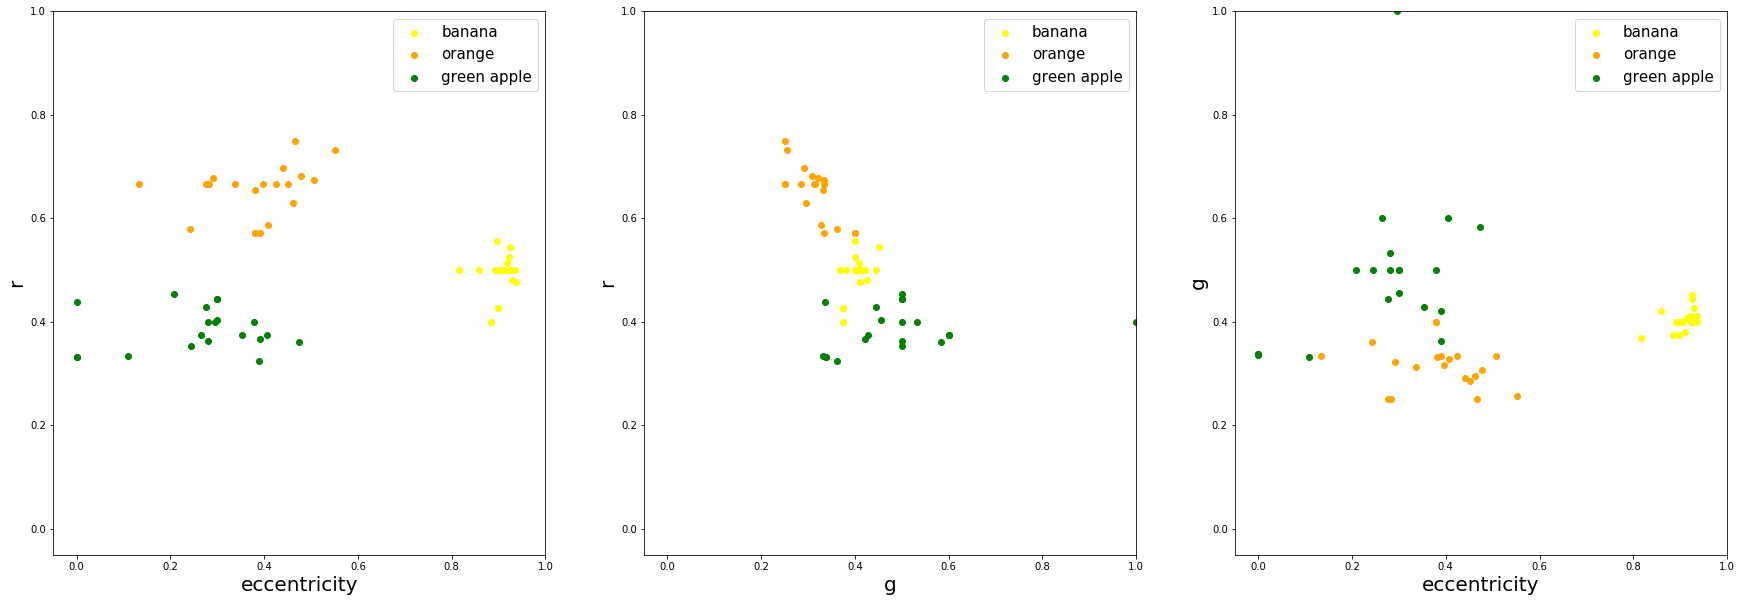

In [3]:
plt.figure(figsize=[30,10])
plt.subplot(131)
plt.scatter(banana['eccentricity'], banana['r'], color='yellow', label='banana')
plt.scatter(orange['eccentricity'], orange['r'], color='orange', label='orange')
plt.scatter(green_apple['eccentricity'], green_apple['r'], color='green', label='green apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('eccentricity', fontsize=20)
plt.ylabel('r', fontsize=20)
plt.legend(fontsize=15)

plt.subplot(132)
plt.scatter(banana['g'], banana['r'], color='yellow', label='banana')
plt.scatter(orange['g'], orange['r'], color='orange', label='orange')
plt.scatter(green_apple['g'], green_apple['r'], color='green', label='green apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('g', fontsize=20)
plt.ylabel('r', fontsize=20)
plt.legend(fontsize=15)

plt.subplot(133)
plt.scatter(banana['eccentricity'], banana['g'], color='yellow', label='banana')
plt.scatter(orange['eccentricity'], orange['g'], color='orange', label='orange')
plt.scatter(green_apple['eccentricity'], green_apple['g'], color='green', label='green apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('eccentricity', fontsize=20)
plt.ylabel('g', fontsize=20)
plt.legend(fontsize=15)

plt.show()

In [4]:
# x_banana = np.array(list(zip(banana['eccentricity'], banana['r'], banana['g'])))
# x_orange = np.array(list(zip(orange['eccentricity'], orange['r'], orange['g'])))
# x_green_apple = np.array(list(zip(green_apple['eccentricity'], green_apple['r'], green_apple['g'])))

x_banana = np.array(list(zip(banana['eccentricity'], banana['r'])))
x_orange = np.array(list(zip(orange['eccentricity'], orange['r'])))
x_green_apple = np.array(list(zip(green_apple['eccentricity'], green_apple['r'])))

# x_banana = np.array(list(zip(banana['g'], banana['r'])))
# x_orange = np.array(list(zip(orange['g'], orange['r'])))
# x_green_apple = np.array(list(zip(green_apple['g'], green_apple['r'])))

mean_banana = np.mean(x_banana, axis = 0)
mean_orange = np.mean(x_orange, axis = 0)
mean_green_apple = np.mean(x_green_apple, axis = 0)

cov= np.random.random((2,2)) #can be varied depending on number of features
cov_banana = cov
cov_orange = cov
cov_green_apple = cov

In [5]:
def component_pdf(x, mean, cov):
    d = 2
    product_1 = 1 / ((2*np.pi)**(d/2) * np.sqrt(np.linalg.det(cov)))
    product_2 = np.exp(-0.5 * np.dot(np.dot((x - mean).T, np.linalg.pinv(cov)),(x - mean)))
    
    return product_1 * product_2

def pdf(P_banana,P_orange,P_green_apple, p_banana, p_orange, p_green_apple): #equation 3 in handout
    denominator = (P_banana*p_banana) + (P_orange*p_orange) + (P_green_apple*p_green_apple)
    
    numerator_banana = P_banana*p_banana
    numerator_orange = P_orange*p_orange
    numerator_green_apple = P_green_apple*p_green_apple
    
    pdf_banana = numerator_banana / denominator
    pdf_orange = numerator_orange / denominator
    pdf_green_apple = numerator_green_apple / denominator
    
    return pdf_banana, pdf_orange, pdf_green_apple

In [6]:
def update(x_banana, x_orange, x_green_apple,
           P_banana, P_orange, P_green_apple,
           mean_banana, mean_orange, mean_green_apple,
           cov_banana, cov_orange, cov_green_apple):
    
    d = 2 #number of features used
    N = 20
    
    P_banana_new = 0
    P_orange_new = 0
    P_green_apple_new = 0
    
    for i in range(20): #updates pdf
        p_banana = component_pdf(x_banana[i], mean_banana, cov_banana)
        p_orange = component_pdf(x_orange[i], mean_orange, cov_orange)
        p_green_apple = component_pdf(x_green_apple[i], mean_green_apple, cov_green_apple)
        
        pdf_classes = pdf(P_banana,P_orange,P_green_apple, p_banana, p_orange, p_green_apple)
        pdf_banana = pdf_classes[0]
        pdf_orange = pdf_classes[1]
        pdf_green_apple = pdf_classes[2]
        
        P_banana_new += pdf_banana
        P_orange_new += pdf_orange
        P_green_apple_new += pdf_green_apple
        
    numerator_banana_mean = 0
    numerator_orange_mean = 0
    numerator_green_apple_mean = 0
        
    for i in range(20): #updates mean
        p_banana = component_pdf(x_banana[i], mean_banana, cov_banana)
        p_orange = component_pdf(x_orange[i], mean_orange, cov_orange)
        p_green_apple = component_pdf(x_green_apple[i], mean_green_apple, cov_green_apple)
        
        pdf_classes = pdf(P_banana,P_orange,P_green_apple, p_banana, p_orange, p_green_apple)
        pdf_banana = pdf_classes[0]
        pdf_orange = pdf_classes[1]
        pdf_green_apple = pdf_classes[2]
        
        numerator_banana_mean += x_banana[i] * pdf_banana
        numerator_orange_mean += x_orange[i] * pdf_orange
        numerator_green_apple_mean += x_green_apple[i] * pdf_green_apple
    
    mean_banana_new = numerator_banana_mean / P_banana_new
    mean_orange_new = numerator_orange_mean / P_orange_new
    mean_green_apple_new = numerator_green_apple_mean / P_green_apple_new
    
    numerator_banana_cov = 0
    numerator_orange_cov = 0
    numerator_green_apple_cov = 0
    
    for i in range(20): #updates covariance
        p_banana = component_pdf(x_banana[i], mean_banana, cov_banana)
        p_orange = component_pdf(x_orange[i], mean_orange, cov_orange)
        p_green_apple = component_pdf(x_green_apple[i], mean_green_apple, cov_green_apple)
        
        pdf_classes = pdf(P_banana,P_orange,P_green_apple, p_banana, p_orange, p_green_apple)
        pdf_banana = pdf_classes[0]
        pdf_orange = pdf_classes[1]
        pdf_green_apple = pdf_classes[2]
        
        numerator_banana_cov += pdf_banana * np.dot((np.array([x_banana[i]]) - mean_banana_new).T, 
                                                (np.array([x_banana[i]]) - mean_banana_new))
        numerator_orange_cov += pdf_orange * np.dot((np.array([x_orange[i]]) - mean_orange_new).T, 
                                                (np.array([x_orange[i]]) - mean_orange_new))
        numerator_green_apple_cov += pdf_green_apple * np.dot((np.array([x_green_apple[i]]) - mean_green_apple_new).T, 
                                                          (np.array([x_green_apple[i]]) - mean_green_apple_new))
        
    cov_banana_new = numerator_banana_cov / P_banana_new
    cov_orange_new = numerator_orange_cov / P_orange_new
    cov_green_apple_new = numerator_green_apple_cov / P_green_apple_new
    
    P_banana_new = (1/len(x_banana)) * P_banana_new
    P_orange_new = (1/len(x_orange)) * P_orange_new
    P_green_apple_new = (1/len(x_green_apple)) * P_green_apple_new
    
    P = np.array([P_banana_new, P_orange_new, P_green_apple_new])
    mean = np.array([mean_banana_new, mean_orange_new, mean_green_apple_new])
    cov = np.array([cov_banana_new, cov_orange_new, cov_green_apple_new])
    
    return P, mean, cov

In [7]:
M_values = [3]
iterations = []
for M in M_values:
    P_banana = 1/M
    P_orange = 1/M
    P_green_apple = 1/M
    
    x_banana = np.array(list(zip(banana['eccentricity'], banana['r'])))
    x_orange = np.array(list(zip(orange['eccentricity'], orange['r'])))
    x_green_apple = np.array(list(zip(green_apple['eccentricity'], green_apple['r'])))

    mean_banana = np.mean(x_banana, axis = 0)
    mean_orange = np.mean(x_orange, axis = 0)
    mean_green_apple = np.mean(x_green_apple, axis = 0)

    np.random.seed(3)
    cov= np.random.random((2,2)) #can be varied depending on number of features
    cov_banana = cov
    cov_orange = cov
    cov_green_apple = cov

    number_of_trials = 100

    for u in range(number_of_trials):
    
        P, mean, cov = update(x_banana, x_orange, x_green_apple,
                              P_banana, P_orange, P_green_apple,
                              mean_banana, mean_orange, mean_green_apple,
                              cov_banana, cov_orange, cov_green_apple)

        difference_1 = np.abs(P_banana - P[0])
        difference_2 = np.abs(P_orange - P[1])
        difference_3 = np.abs(P_green_apple - P[2])
        print(u, difference_1 + difference_2 + difference_3)

        P_banana = P[0]
        P_orange = P[1]
        P_green_apple = P[2]

        mean_banana = mean[0]
        mean_orange = mean[1]
        mean_green_apple = mean[2]

        cov_banana = cov[0]
        cov_orange = cov[1]
        cov_green_apple = cov[2]

        n = 100

        x_vals = np.linspace(0,1, n)
        y_vals = np.linspace(0,1, n)

        X,Y = np.meshgrid(x_vals,y_vals)

        pdf_vals_b = np.zeros([n,n])
        pdf_vals_o = np.zeros([n,n])
        pdf_vals_g = np.zeros([n,n])

        for i in range(n):
            for j in range(n):
                pdf_vals_b[i][j] += component_pdf(np.array([X[i,j],Y[i,j]]), mean_banana, cov_banana)
                pdf_vals_o[i][j] += component_pdf(np.array([X[i,j],Y[i,j]]), mean_orange, cov_orange)
                pdf_vals_g[i][j] += component_pdf(np.array([X[i,j],Y[i,j]]), mean_green_apple, cov_green_apple)

        if (difference_1 + difference_2 + difference_3) < 0.0001:
            print('threshold difference reached.')
            iterations.append(u + 1)
            break

0 0.019213680887615547
1 0.667338839991878
2 0.21047391899500284
3 0.06685942746437491
4 0.016420977546821997
5 0.003932094633992788
6 0.000922027679346917
7 0.00021409741758989426
8 9.862407053679408e-05
threshold difference reached.


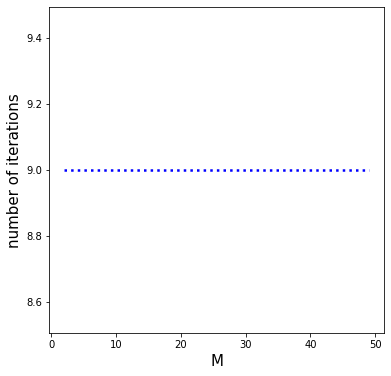

In [9]:
M_values = np.arange(2,50)
iteration_values = [9]*len(M_values)

plt.figure(figsize=[6,6])
plt.plot(M_values,iteration_values, linestyle = 'dotted', linewidth = 2.5 ,color='blue')
plt.xlabel('M', fontsize=15)
plt.ylabel('number of iterations',fontsize=15)
plt.show()

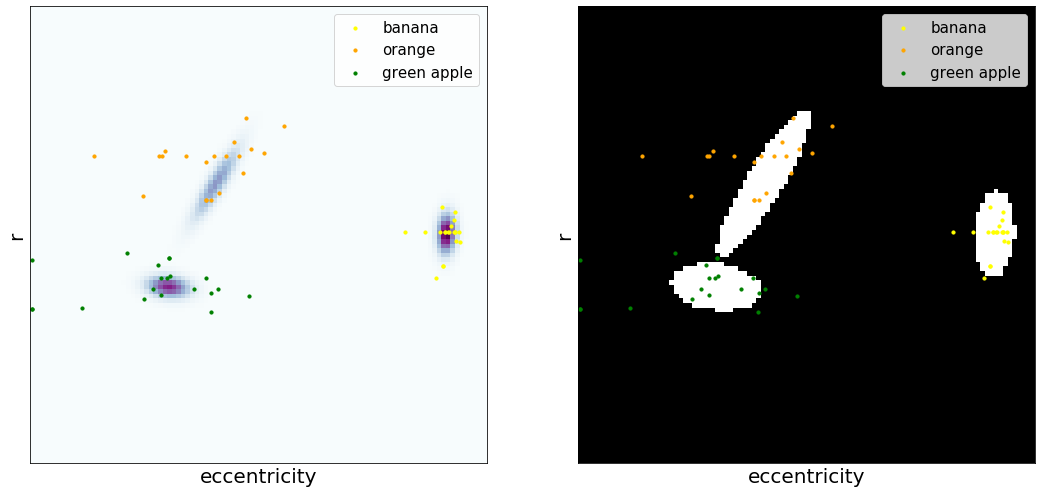

In [10]:
pdf_vals = pdf_vals_g+pdf_vals_o+pdf_vals_b

image =(pdf_vals / pdf_vals.max()) * 255
threshold = 1
image[image > threshold] = 255
image[image <= threshold]= 0

size = 10

plt.figure(figsize=[9*2,9])
plt.subplot(121)
plt.imshow(pdf_vals, origin = 'lower', cmap=plt.cm.BuPu)
plt.scatter(banana['eccentricity']*n, banana['r']*n, s = size, color='yellow', label='banana')
plt.scatter(orange['eccentricity']*n, orange['r']*n, s = size, color='orange', label='orange')
plt.scatter(green_apple['eccentricity']*n, green_apple['r']*n, s = size, color='green', label='green apple')
plt.xlim(-0.5,99.5)
plt.ylim(-0.5,99.5)
plt.xticks([])
plt.yticks([])
plt.xlabel('eccentricity', fontsize=20)
plt.ylabel('r', fontsize=20)
plt.legend(fontsize=15)

plt.subplot(122)
plt.imshow(image, cmap = 'gray', origin = 'lower')
plt.scatter(banana['eccentricity']*n, banana['r']*n, s = size, color='yellow', label='banana')
plt.scatter(orange['eccentricity']*n, orange['r']*n, s = size, color='orange', label='orange')
plt.scatter(green_apple['eccentricity']*n, green_apple['r']*n, s = size, color='green', label='green apple')
plt.xlim(-0.5,99.5)
plt.ylim(-0.5,99.5)
plt.xlabel('eccentricity', fontsize=20)
plt.ylabel('r', fontsize=20)
plt.legend(fontsize=15)
plt.xticks([])
plt.yticks([])

plt.show()